### [Содержание](#Содержание)  <a name="Содержание"></a>
#### [Описание проекта](#Описаниепроекта)  
#### [Описание данных](#Описаниеданных)  
#### [Шаг 1. Изучение общей информации](#Шаг1)  
 
[1.1 Вывод](#Шаг1.1)  

#### [Шаг 2. Подготовка данных](#Шаг2)


[2.1 Замена названия столбцов (приведение к нижнему регистру)](#Шаг2.1)    
[2.2 Обработка пропусков](#Шаг2.2)    
[2.3 Преобразование данных в нужные типы](#Шаг2.3)  
[2.4 Cуммарные продажи во всех регионах](#Шаг2.4)  
[2.5 Вывод](#Шаг2.5) 

#### [Шаг 3. Исследовательский анализ данных](#Шаг3)  
[3.1 Количество игр выпущенные в разные годы](#Шаг3.1)   
[3.2 Изменение продаж по платформам](#Шаг3.2)   
[3.3 Лидирующие по продажам платформы](#Шаг3.3)   
[3.4 График «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам ](#Шаг3.4)   
[3.5 Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы . Диаграмма рассеяния и  корреляция между отзывами и продажами](#Шаг3.5)   
[3.6  Соотнесение выводов с продажами игр на других платформах](#Шаг3.6)  
[3.7 Общее распределение игр по жанрам](#Шаг3.7)  
[3.8 Вывод](#Шаг3.8)    

#### [Шаг 4. Портрет пользователя каждого региона](#Шаг4)    
[4.1 Самые популярные платформы (топ-5) в Северной Америке, Европе и Японии](#Шаг4.1)    
[4.2 Самые популярные жанры (топ-5) в Северной Америке, Европе и Японии](#Шаг4.2)   
[4.3 Влияние рейтинга ESRB на продажи в отдельном регионе](#Шаг4.3)   
[4.4 Вывод](#Шаг4.4)    

#### [Шаг 5. Проверка гипотезы](#Шаг5)
[5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#Шаг5.1)  
[5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные](#Шаг5.2)  
[5.3 Вывод](#Шаг5.3)  

#### [Шаг 6. Общий вывод](#Шаг6)

### Шаг 1. Изучение общей информации<a name="Шаг1"></a>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
#games = pd.read_csv('Documents/Yandex.Practicum/Sprint5/games.csv')
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
#Проверка на дубликаты
games.duplicated().sum()

0

#### Вывод:  <a name="Шаг1.1"></a>
В столбце ***Name*** неправильно заполнены названия, лишние точки, разные регистры - опечатки, надо привести к одному формату;  
Значения ***Year_of_Release*** явно должны быть целочисленными, так как это год;  
Пропуски в столбцах ***Critic_Score, User_Score, Rating*** - возможно было слишком мало оценок и они не попали в рейтинг;  
Дубликатов нет

### Шаг 2. Подготовка данных <a name="Шаг2"></a>

#### Замена названия столбцов (приведение к нижнему регистру) <a name="Шаг2.1"></a>

In [7]:
#Меняю регистр названия столбцов
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Обработка пропусков <a name="Шаг2.2"></a>
- 
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- 
Опишите причины, которые могли привести к пропускам;
- 
Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;

In [8]:
#Посмотрим на пропуски в столбцах
games['critic_score'].isnull().sum()

8578

In [9]:
games['user_score'].isnull().sum()

6701

In [10]:

games['user_score'] = games['user_score'].fillna(-1)
games['critic_score'] = games['critic_score'].fillna(-1)

In [11]:
games['rating'].isnull().sum()

6766

Пропуски в столбцах с отзывами  могли появиться из-за слишком малого количества оценок и они не попали в рейтинг,  заполню значениями -1, в дальнейшем анализе будем брать данные >= 0 что бы коэффициенты в корреляционном анализе не изменились от замены. 

In [12]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,-1.0,-1,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,-1.0,-1,NaN


In [13]:
#Удаляю строки с пропусками в столбце name  так как по этим играм практически все данные пропущены
games.dropna(subset = ['name'], inplace = True)

In [14]:
games['name'].isnull().sum()

0

In [15]:
#В таблице попадается значение, посмотри что оно может означать
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,-1.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,-1.0,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,-1.0,tbd,E


tbd - To Be Determined, то есть "Будет определено", пишется, когда количество оценок еще не достаточно для определения общего рейтинга игры.

In [16]:
games['user_score'].value_counts()

-1     6699
tbd    2424
7.8     324
8       290
8.2     282
       ... 
0.7       2
0.6       2
1         2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

In [17]:
#Так как нулей мало, то заменим значения tbd на -1 
#в дальнейшем анализе будем брать данные >= 0 что бы коэффициенты в корреляционном анализе не изменились от замены. 
games.loc[games['user_score'] == 'tbd', ['user_score']] = -1


In [18]:
games['user_score'].value_counts()

-1     9123
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.6       2
1.5       2
1         2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [19]:
games['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Значение аббривиатур:  
  
**«T»** («Teen») — «Подросткам 13—19 лет»;  
**«EC»** («Early childhood») — «Для детей младшего возраста»: 3+ лет;  
**«E»** («Everyone») — «Для всех»: 6+ лет;  
**«K-A»** for Kids to Adults: использовался до 1998, затем переименовали в **«E»**;  
**«E10+»** («Everyone 10 and older») — «Для всех старше 10 лет»;  
**«M»** («Mature») — «От 17 лет»;  
**«AO»** («Adults Only 18+») — «Только для взрослых»;  
**«RP»** ( «Rating Pending»») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоение рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официального релиза.

In [20]:
#Проверяю места пропусков в столбце year_of_release, что бы понять как их заполнять
games[games['year_of_release'].isnull()]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,-1.0,-1,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,-1.0,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,-1,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,-1.0,-1,NaN


In [21]:
#Заполняю пропуски в играх с одинаковым названием но для разных приставок одинаковыми годами, так чаще всего они выходят одновременно на все приставки
games['year_of_release'] = games['year_of_release'].fillna(games.groupby('name')['year_of_release'].transform('median'))




In [22]:
#Заполняю оставшиеся пропуски с годами выпуска в соответствии с информацией об их релизе в интернете
games.loc[games['name'] == 'Rock Band','year_of_release'] = '2007'
games.loc[games['name'] == 'wwe Smackdown vs. Raw 2006','year_of_release'] = '2001'
games.loc[games['name'] == 'Homeworld Remastered Collection','year_of_release'] = '2015' 
games.loc[games['name'] == 'Shorts','year_of_release'] = '2009'
games.loc[games['name'] == 'Agarest Senki: Re-appearance','year_of_release'] = '2010'
games.loc[games['name'] == 'Hakuouki: Shinsengumi Kitan','year_of_release'] = '2014'
games.loc[games['name'] == 'Virtua Quest','year_of_release'] = '2004'

print('Пропусков осталось:', games['year_of_release'].isnull().sum())


Пропусков осталось: 135


In [23]:
#Удаляю оставшиеся пропуски, так как их осталось незначительное количество
games.dropna(subset = ['year_of_release'], inplace = True)


#### Преобразование данных в нужные типы<a name="Шаг2.3"></a>

In [24]:
#Привожу год релиза в целочисленных тип
games['year_of_release'] = games['year_of_release'].astype(int)
games['user_score'] = games['user_score'].astype(float)
#games['year_of_release'] = pd.to_numeric(games['year_of_release'], errors = 'coerce')

In [25]:
#Проверка, что тип изменен верно
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16578 entries, 0 to 16714
Data columns (total 11 columns):
name               16578 non-null object
platform           16578 non-null object
year_of_release    16578 non-null int64
genre              16578 non-null object
na_sales           16578 non-null float64
eu_sales           16578 non-null float64
jp_sales           16578 non-null float64
other_sales        16578 non-null float64
critic_score       16578 non-null float64
user_score         16578 non-null float64
rating             9876 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


#### Cуммарные продажи во всех регионах <a name="Шаг2.4"></a>

In [26]:
#Подсчет суммарных продаж во всех регионах 
games['all_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,NaN,0.01


#### Вывод:  <a name="Шаг2.5"></a>
- 
Названия столбцов приведены к нижнему регистру;  
- 
Разобралась со значением tbd - To Be Determined, то есть "Будет определено", пишется, когда количество оценок еще не достаточно для определения общего рейтинга игры, заменила его на 0, так как он был всего 1 среди всех значений рейтинга, при дальнейшем анализе помним, что 0 не плохая оценка, а отсутствие данных;  
- 
Пропуски в столбцах с рейтингом  могли появиться из-за слишком малого количества оценок и они не попали в рейтинг,  оставляю их не тронутыми, так как далее потребуется провести по ним корреляционный анализ, если заполнить пропуски отвелеченным значением, медианой или средним, то коэффициент корреляции может сильно сместиться;  
- 
Удалила строки с пропусками в столбце name так как по этим 2м играм практически все данные пропущены, а среди общего количества игр они составляют очень маленький процент;
- 
Заполнила пропуски в годах релиза игр с одинаковым названием но для разных приставок одинаковыми годами, так чаще всего они выходят одновременно на все приставки
- 
Посчитала суммарные продажи во всех регионах и записала их в отдельный столбец

### Шаг 3. Исследовательский анализ данных<a name="Шаг3"></a>

In [27]:
#Функция для постоения диаграмм
def diagram_bild(df, x, y, t):
    if x == 'year_of_release':
        plot = df.groupby(x)[y].count().plot(y = 'частота', kind = 'bar', figsize = (9, 6), title = t, grid = True)
    else:
        plot = df.groupby(x)[y].sum().sort_values().plot(kind = 'bar', figsize = (9, 6), title = t, grid = True)
    plt.xlabel(x);
    plt.ylabel(y);
    plt.show();
    return plot

#### Количество игр выпущенные в разные годы<a name="Шаг3.1"></a>

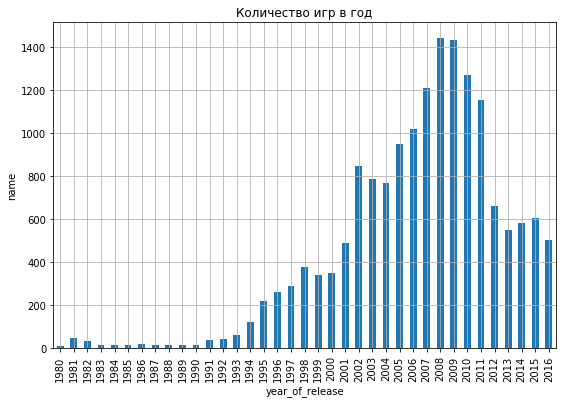

,name
year_of_release,
1980,9
1984,14
1985,14
1988,15
1990,16
1987,16
1989,17
1983,17
1986,21


In [28]:
#Количество игр выпущенные в разные годы
diagram_bild(games, 'year_of_release', 'name', 'Количество игр в год')


games.groupby('year_of_release')['name'].count().sort_values(ascending = True).to_frame()

##### Больше всего игр выпускалось в период с 2006 по 2011 годы, самый пик в 2008 - 2009 годы.  
В период с 1980 по 1994 выпускалось очень мало игр так что данные за этот период можем не считать и дальнейший анализ будем проводить по данным с 1995 по 2016 год.  

#### Изменение продаж по платформам <a name="Шаг3.2"></a>
#### Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [29]:
#Продажи по платформам

games.groupby('platform')['all_sales'].sum().sort_values(ascending = True).to_frame()


,all_sales
platform,
PCFX,0.03
GG,0.04
3DO,0.10
TG16,0.16
WS,1.42
NG,1.44
SCD,1.86
DC,15.95
GEN,28.35


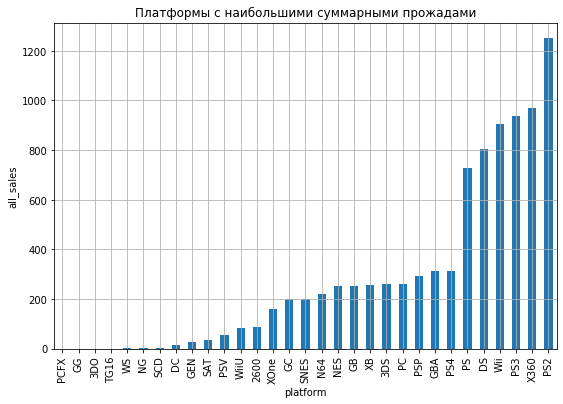

In [30]:
#Платформы с наибольшими суммарными прожадами
diagram_bild(games, 'platform', 'all_sales', 'Платформы с наибольшими суммарными прожадами')

5 платформ **PS2, X360, PS3, Wii, DS, PS** особо популярны по отношению к другим, их средний уровень продаж превышает в два раза уровень продаж остальных платформ, но захватим еще **PS4** для анализа, так как эта платформа только появилась и возможно низкая прибыль, которая она принесла связана с новизной платформы.

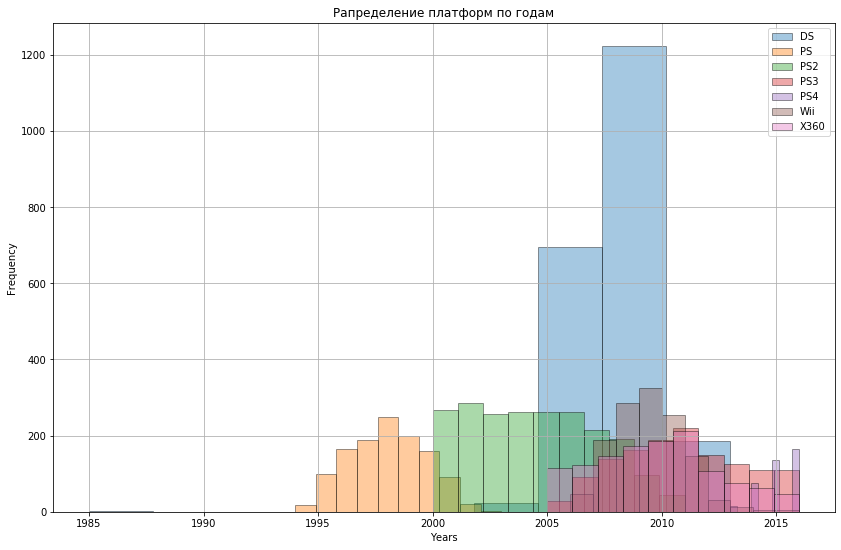

In [31]:
#Распределение жизни игровых платформ по годам на графике 
platform_filtered = games[games['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4'])]

platform_filtered.groupby('platform')['year_of_release'].plot.hist(alpha = 0.4, figsize = (14,9), grid = True, ec = 'black')

plt.title('Рапределение платформ по годам')
plt.xlabel('Years')
plt.legend()
plt.show()

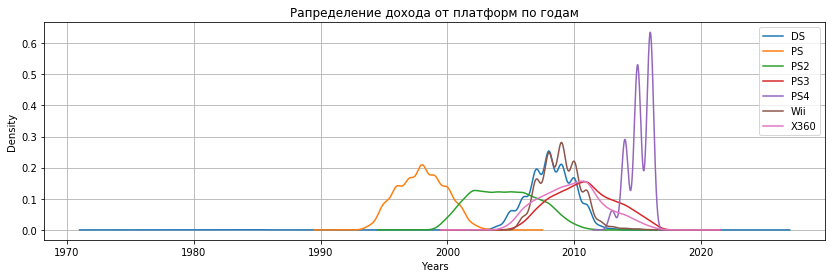

In [32]:
#Распределение жизни игровых платформ по годам на графике второй вариант для наглядности
platform_filtered.groupby('platform')['year_of_release'].plot( kind = 'density', figsize = (14,4), grid = True)
plt.title('Рапределение дохода от платформ по годам')
plt.xlabel('Years')
plt.legend()
plt.show()

In [33]:
#Распределение жизни игровых платформ по годам в числовом виде(прибыль за год)
platform_filtered.pivot_table(index = ['year_of_release'], columns = 'platform', values = 'all_sales', aggfunc= (sum)).fillna('-')

platform,DS,PS,PS2,PS3,PS4,Wii,X360
year_of_release,,,,,,,
1985,0.02,-,-,-,-,-,-
1994,-,6.03,-,-,-,-,-
1995,-,35.96,-,-,-,-,-
1996,-,94.7,-,-,-,-,-
1997,-,136.17,-,-,-,-,-
1998,-,169.49,-,-,-,-,-
1999,-,144.53,-,-,-,-,-
2000,-,96.37,39.17,-,-,-,-
2001,-,35.59,169.43,-,-,-,-


Из графика видно следующее распределение годов жизни платформ: 

**PS**: 1994 - 2003  = 9 лет.   
**PS2**: 2000 - 2011 = 11 лет.   
**DS**: 2004 - 2013 = 9 лет.   
**X360**: 2005 - наст. время(2016)  
**PS3**: 2005 - наст. время(2016)   
**Wii**: 2006 - наст. время(2016)  
**PS4**: 2013 -  наст. время(2016) 
 
  
То есть в среднем платформы держатся на рынке 10 лет. По этому предположительно **PS4** будет популярна на рынке еше до 2023 года.


#### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

#### Не учитывайте в работе данные за предыдущие годы.

Возьмем за актуальный период 2005 - 2016гг., поскольку из приведенных выше графиков видно, что самые популярные платформы появлялись в районе 2005 года а данные нужны как можно более актуальные, поскольку анализ проводится для определения компании на 2017 год.



In [34]:
#Оставляю данные за актуальный период
games_filtered = games[games['year_of_release'] > 2005]


#### Лидирующие по продажам платформы <a name="Шаг3.3"></a>

In [35]:
#Общий доход от каждой платформы
sales = games_filtered.groupby('platform')['all_sales'].sum()
sales.sort_values()

platform
DC        0.06
GBA       8.86
XB       10.77
GC       11.82
PSV      53.81
WiiU     82.19
XOne    159.32
PC      166.47
PSP     242.67
3DS     258.51
PS2     267.60
PS4     314.14
DS      656.86
Wii     905.40
PS3     936.64
X360    959.86
Name: all_sales, dtype: float64

По принесенной прибыли за все время лидируют **X360, PS3** и **Wii**

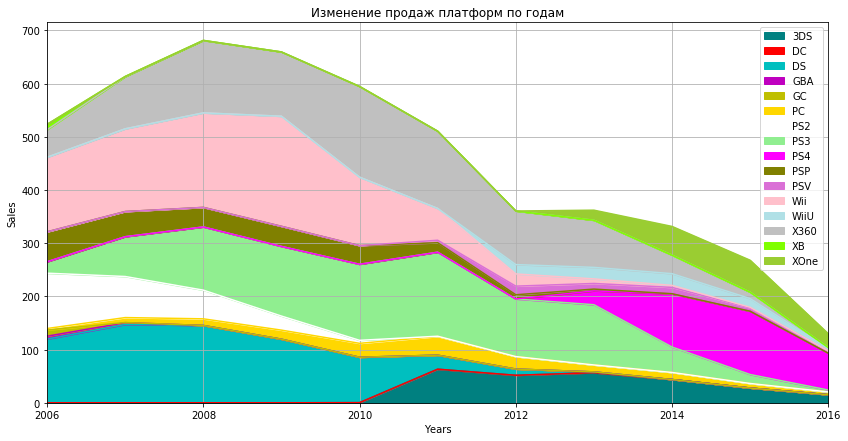

In [36]:
#График продаж платформ по годам
colours = ['teal', 'r', 'c', 'm', 'y', 'gold', 'w', 'lightgreen',
           'magenta', 'olive', 'orchid', 'pink', 'powderblue', 'silver', 'chartreuse', 'yellowgreen']

games_filtered.pivot_table(index= ['year_of_release'],
                           columns = 'platform', values = 'all_sales', aggfunc = 'sum').plot.area(grid=True,
                                                                                                  color = colours, 
                                                                                 title = 'Изменение продаж платформ по годам',
                                                                                                  figsize=(14, 7))
plt.legend()
plt.xlabel('Years')
plt.ylabel('Sales')

plt.show()

Несмотря на то, что по принесенной прибыли за все время лидируют **X360, PS3** и **Wii**, по продажам в последние годы лидируют **PS4, XOne, 3DS, PS3**, это связано с тем, что пик продаж приходился на 2008 год, к 2016 году продажи по всем платформам снизились, соответственно и общая прибыль более молодых платформ снизилась.  
В 2016 году больше всего прибыли приносит **PS4**.




#### График «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам <a name="Шаг3.4"></a>

In [37]:
#Оставим для анадиза самые прибыльные платформы
##Так как пропуски в столбцах с отзывами были заполнены значениями -1 
#берем данные по отзывам >= 0 что бы значения не пеменялись из-за предыдущей замены.
best_sellers = games_filtered[games_filtered['platform'].isin(['PS4', 'XOne', '3DS', 'PS3'])]
best_sellers = best_sellers[best_sellers['critic_score'] >= 0]
best_sellers = best_sellers[best_sellers['user_score'] >= 0]

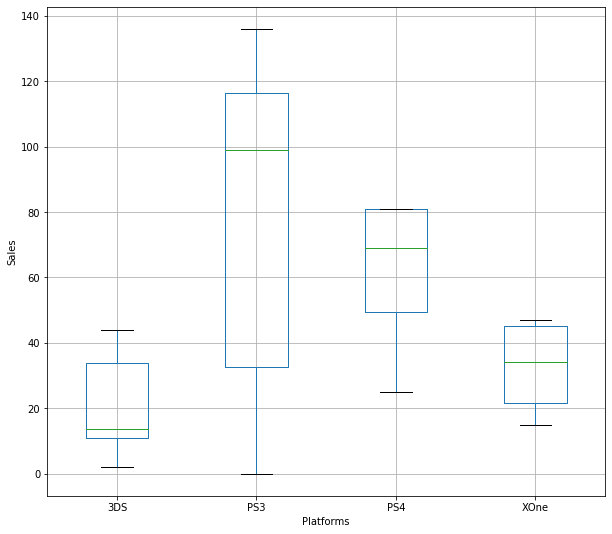

In [38]:
#Диаграмма размаха по глобальным продажам с разбивкой по платформам
best_sellers.pivot_table(index= ['year_of_release'],
                           columns = 'platform', values = 'all_sales', 
                         aggfunc = 'sum').boxplot(figsize = (10,9))
plt.xlabel('Platforms')
plt.ylabel('Sales')

plt.show()

Медиана распределения продаж больше всех у **PS3**(~ 99), затем идет **PS4**(~ 70), **XOne**(~30) и самая маленькая у  **3DS**(~ 15), то есть получается, что **PS3** и **PS4** по медиане приносят в два раза больше продаж, чем другие платформы.



#### Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы . Диаграмма рассеяния и  корреляция между отзывами и продажами <a name="Шаг3.5"></a>

Возьмем данные по **PS3** так как среди прочих она просуществовала уже долгое время, значит данных достаточно, а так же все еще является одной из лидирующей платформ на рынке.

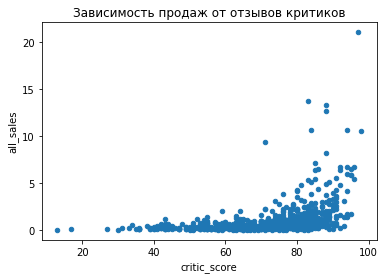

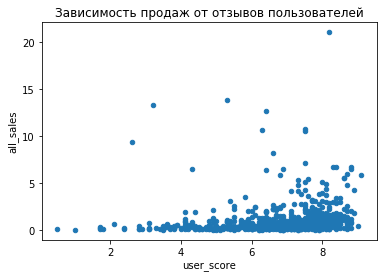

In [39]:

#Диаграмма рассеяния зависимости продаж по PS3 от отзывов 
best_sellers[best_sellers['platform'] =='PS3'].plot(x='critic_score',
                                                    y='all_sales',
                                                    kind='scatter',
                                                    title = 'Зависимость продаж от отзывов критиков')
best_sellers[best_sellers['platform'] =='PS3'].plot(x='user_score',
                                                    y='all_sales', 
                                                    kind='scatter',
                                                    title = 'Зависимость продаж от отзывов пользователей')

По диаграммам видно, что чем лучше отзыв кртивков у игры, тем больше она продается и тем самым приносит больше прибыли, это логично, поскольку часто игры покупают опираясь на отзыв критиков, чем он лучше и больше рейтинг, тем чаще игру будут покупать).  
С рейтингом игроков такая же картина, однако присутствует больше выбросов, вероятно, так получается поскольку игроки покупают известную игру, но в последствии разочаровываются в ней, на вкус и цвет. 

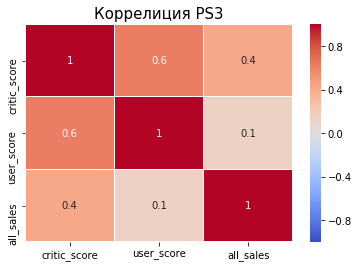

In [40]:
#Корреляция между отзывами и продажами по PS3
PS3 = best_sellers[best_sellers['platform'] =='PS3']
PS3 = PS3[['critic_score', 'user_score', 'all_sales']].corr()
f, ax = plt.subplots()
sns.heatmap(PS3, ax = ax, cmap= 'coolwarm', vmin=-1, vmax=1, linewidths = 0.1, annot = True, fmt='.1g')
ax.set_title('Коррелиция PS3',fontsize = 15)
plt.show()

Продажи больше зависят от отзывов критиков, чем от отзывов пользователей.

#### Соотнесение выводов с продажами игр на других платформах <a name="Шаг3.6"></a>

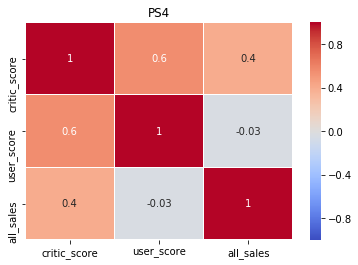

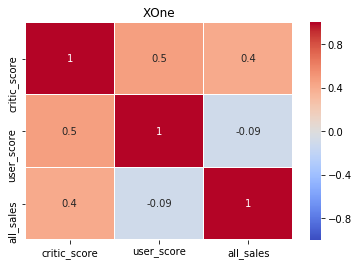

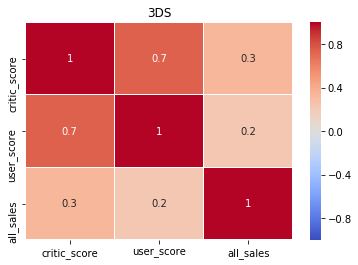

In [42]:
#Корреляция между отзывами и продажами по остальным лидирующим на рынке платформам

PS4 = best_sellers[best_sellers['platform'] == 'PS4']
PS4 = PS4[['critic_score','user_score', 'all_sales']].corr()

XOne = best_sellers[best_sellers['platform'] == 'XOne']
XOne = XOne [['critic_score','user_score', 'all_sales']].corr()

DS3 = best_sellers[best_sellers['platform'] == '3DS']
DS3 = DS3[['critic_score','user_score', 'all_sales']].corr()


count = 0
table = [PS4, XOne, DS3]
dict = ['PS4', 'XOne', '3DS']
for row in table:
    f, ax = plt.subplots()
    titles = dict[count]
    sns.heatmap(row, ax = ax, cmap= 'coolwarm', vmin=-1, vmax=1, linewidths = 0.1, annot = True, fmt='.1g')

        
    ax.set_title(titles)
    plt.show()
    count+=1


**PS4** продажи больше, чем больше рейтинг критиков, и практически не зависят от отзывов пользователей(в PS3 отзывы пользователей имеют более весомое значение чем у данной платформы);  
**XOne** также продажи больше, чем больше рейтинг критиков, и практически не зависят от отзывов пользователей(в PS3 отзывы пользователей имеют более весомое значение чем у данной платформы);  
**DS3** продажи одинаково зависят как от отзывов критиков, так и от отзывов пользователей.

#### Общее распределение игр по жанрам <a name="Шаг3.7"></a>

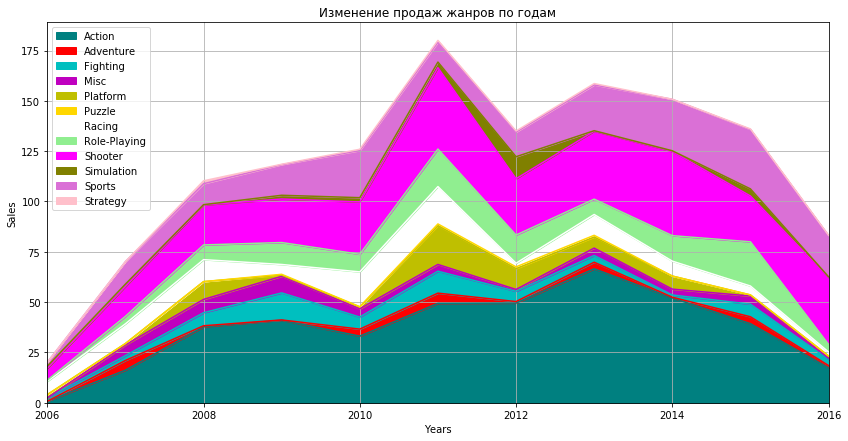

,all_sales
genre,
Puzzle,3.22
Strategy,4.97
Adventure,23.02
Simulation,24.78
Misc,39.92
Platform,55.83
Fighting,59.61
Racing,94.03
Role-Playing,109.90


In [43]:
#График продаж платформ по годам


best_sellers.pivot_table(index= ['year_of_release'],
                           columns = 'genre', values = 'all_sales', aggfunc = 'sum').plot.area(grid=True,
                                                                                                  color = colours, 
                                                                                 title = 'Изменение продаж жанров по годам',
                                                                                                  figsize=(14, 7))
plt.legend()
plt.xlabel('Years')
plt.ylabel('Sales')

plt.show()
#Общий доход от каждого жанра
genre_sales = best_sellers.groupby('genre')['all_sales'].sum()
genre_sales.sort_values().to_frame()



**Action** - самый прибыльный жанр, за последние 10 лет на ходовых платформах принес  491.52 миллиона долларов. С 2006 года набор популярность достиг пика в 2013-2014 годах, а после 2014 прибыль по нему начала уменьшаться. Стоит заметить что прибыль падает к 2016 году от всех жанров.  
В последние годы самыми прибыльными являются **Action**, **Shooter**, **Role-Playing** и **Sports**. Эти жанры и за 10-тилетие принесли больше всего прибыли, следом за ними идет **Racing**, а оставшиеся игры принесли прибыть сильно менее 100 миллионов долларов за 10 лет.  
Самые не прибыльные жанры **Puzzle** и **Strategy** принесли меньше 5 миллионов долларов за 10 лет.


### Вывод:  <a name="Шаг3.8"></a>

#### Количество игр, выпущенных в разные годы:
- 
Больше всего игр выпускалось в период с 2006 по 2011 годы, самый пик в 2008 - 2009 годы.  
В период с 1980 по 1994 выпускалось очень мало игр так что данные за этот период можем не считать и дальнейший анализ будем проводить по данным с 1995 по 2016 год.;

#### Уровень продаж и цикл жизни платформ:
- 
5 платформ **PS2, X360, PS3, Wii, DS, PS** особо популярны по отношению к другим, их средний уровень продаж превышает в два раза уровень продаж остальных платформ;
- 
По данным 5-ки самых популярных платформ в среднем платформы держатся на рынке 10 лет:  
**PS**: 1994 - 2003  
**PS2**: 2000 - 2011  
**DS**: 2004 - 2013  
**X360**: 2005 - 2016  
**PS3**: 2005 - 2016  
**Wii**: 2006 - 2016  
**PS4**: 2013 -  наст. время
 
  
То есть в среднем платформы держатся на рынке 10 лет. Поэтому предположительно **PS4** будет популярна на рынке еще до 2023 года;
- 
Несмотря на то, что по принесенной прибыли за все время лидируют **X360, PS3** и **Wii**, по продажам в последние годы лидируют **PS4, XOne, 3DS, PS3**, это связано с тем, что пик продаж приходился на 2008 год, к 2016 году продажи по всем платформам снизились, соответственно и общая прибыль более молодых платформ снизилась.  
В 2016 году больше всего прибыли приносит **PS4**.

#### Разница в продажах по платформам за последние 10 лет:
- 
Медиана распределения продаж больше всех у **PS3**(~ 99), затем идет **PS4**(~ 70), **XOne**(~ 30) и самая маленькая у  **3DS**(~ 15), то есть получается, что **PS3** и **PS4** по медиане приносят в два раза больше продаж, чем другие платформы.


#### Зависимость продаж от отзывов:
- 
Согласно данным по платформе **PS3**, которая среди прочих просуществовала достаточно долго и все еще является одной из лидирующей платформ на рынке, чем лучше отзыв критиков у игры, тем больше она продается и тем самым приносит больше прибыли, это логично, поскольку часто игры покупают опираясь на отзыв критиков, чем он лучше и больше рейтинг, тем чаще игру будут покупать).  
С рейтингом игроков такая же картина, однако присутствует больше выбросов, вероятно, так получается поскольку игроки покупают известную игру, но в последствии разочаровываются в ней, на вкус и цвет. 
  
#### Соотнесение выводов по продажам игр на PS4 с другими платформами:
- 
У **PS4** продажи зависят от отзывов критиков, чем выше рейтинг критиков, тем больше продаж, и практически не зависят от отзывов пользователей (в PS3 отзывы пользователей имеют более весомое значение чем у данной платформы);  
У **XOne** также продажи больше, чем больше рейтинг критиков, и практически не зависят от отзывов пользователей (в PS3 отзывы пользователей имеют более весомое значение чем у данной платформы);  
А вот у **DS3** продажи одинаково зависят как от отзывов критиков, так и от отзывов пользователей.

#### Распределение прибыли по жанрам:
- 
**Action** - самый прибыльный жанр, за последние 10 лет на ходовых платформах принес  491.52 миллиона долларов. С 2006 года набор популярность достиг пика в 2013-2014 годах, а после 2014 прибыль по нему начала уменьшаться. Стоит заметить что прибыль падает к 2016 году от всех жанров.  
В последние годы самыми прибыльными являются **Action**, **Shooter**, **Role-Playing** и **Sports**. Эти жанры и за 10-тилетие принесли больше всего прибыли, следом за ними идет **Racing**, а оставшиеся игры принесли прибыть сильно менее 100 миллионов долларов за 10 лет.  
Самые не прибыльные жанры **Puzzle** и **Strategy** принесли меньше 5 миллионов долларов за 10 лет.




### Шаг 4. Портрет пользователя каждого региона <a name="Шаг4"></a>

#### Определите для пользователя каждого региона (NA na_sales , EU eu_sales, JP jp_sales):
- 
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- 
Самые популярные жанры (топ-5). Поясните разницу.
- 
Влияет ли рейтинг ESRB на продажи в отдельном регионе?


#### Самые популярные платформы (топ-5) в Северной Америке, Европе и Японии <a name="Шаг4.1"></a>

In [44]:
#Функция построения графиков преференции по регионам
def region_preferences(df, column, value, title):
    
    df.pivot_table(index= ['year_of_release'],columns = column,
                   values = value, aggfunc = 'sum').plot.area(grid=True,color = colours,
                                                              figsize=(9, 7), title = title )
    plt.legend()
    plt.xlabel('Years')
    plt.ylabel('Sales')

    plt.show()
    
def plots(df, group, by, title, ax):
    table = df.query('year_of_release > 2015').groupby(group)[by].sum().sort_values(ascending = False)
    plot = table.plot(kind = 'bar', title = title, ax=axes[ax])


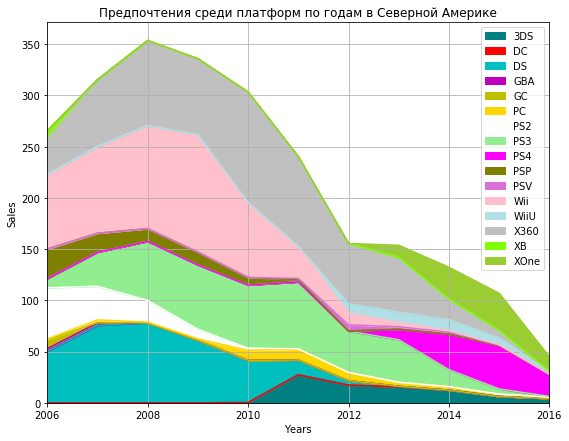

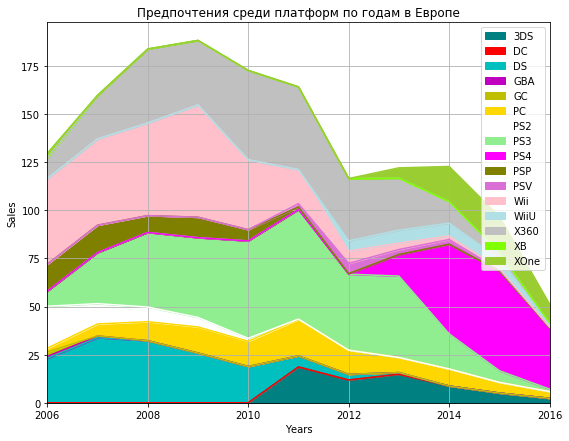

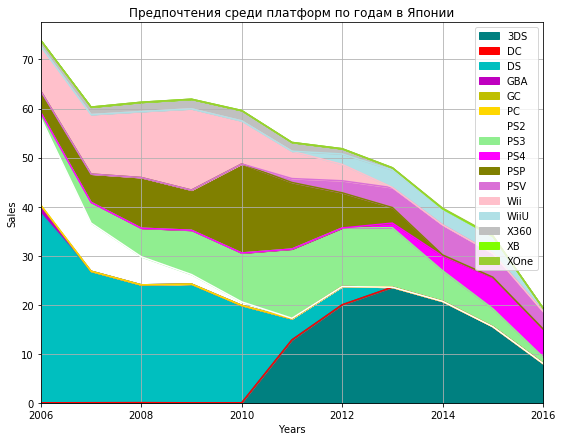

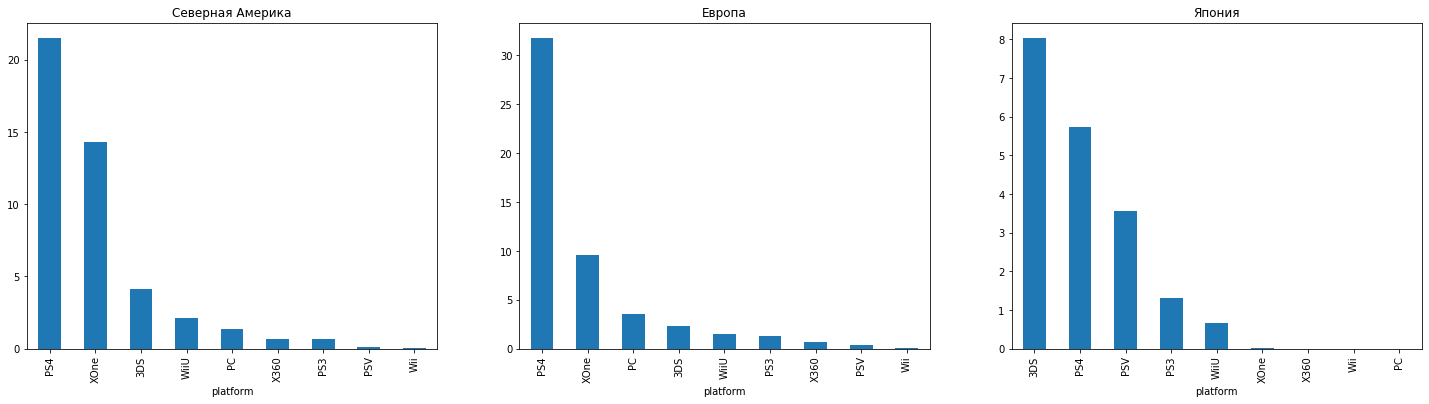

In [45]:

    
#График продаж по платформам в Северной Америке
region_preferences(games_filtered, 'platform', 'na_sales', 'Предпочтения среди платформ по годам в Северной Америке')

    
#График продаж по платформам в Европе
region_preferences(games_filtered, 'platform', 'eu_sales', 'Предпочтения среди платформ по годам в Европе')

#График продаж по платформам в Японии
region_preferences(games_filtered, 'platform', 'jp_sales', 'Предпочтения среди платформ по годам в Японии')

fig, axes = plt.subplots(1, 3, figsize=(25,6))
#Продажи по платформам за 2016 год в Северной Америке
plots(games_filtered, 'platform', 'na_sales', 'Северная Америка', 0)

#Продажи по платформам за 2016 год в Европе
plots(games_filtered, 'platform', 'eu_sales', 'Европа', 1)

#Продажи по платформам за 2016 год в Японии
plots(games_filtered, 'platform', 'jp_sales', 'Япония', 2)

В Северной Америке самой популярной платформой к 2016 году стала **PS4**, на втором месте **XOne**, 3место - **3DS**, 4ое - **WiiU** и на 5 месте -  **PC**.  
Новые платформы пользуются большей популярностью, что и не удивительно, ведь с каждой выпущенной платформой улучшается ее функционал;  
  
В Европе самой популярной платформой к 2016 году стала **PS4**, на втором месте **XOne**, 3место - **PC**, 4ое - **3DS** и на 5 месте -  **WiiU**.   
Разница с предпочтениями в Северной Америке начинается с 3 места, первые два идентичны, **PC**, в Америке занимает 5 место, а в Европе 3;    
  
В Японии картина предпочтений платформ совершенно иная, чем в Северной Америке и Европе:  
1 место - **3DS**  
2 место - **PS4**  
3 место - **PSV**  
4 место - **PS3**  
5 место - **WiiU**


#### Самые популярные жанры (топ-5) в Северной Америке, Европе и Японии <a name="Шаг4.2"></a>

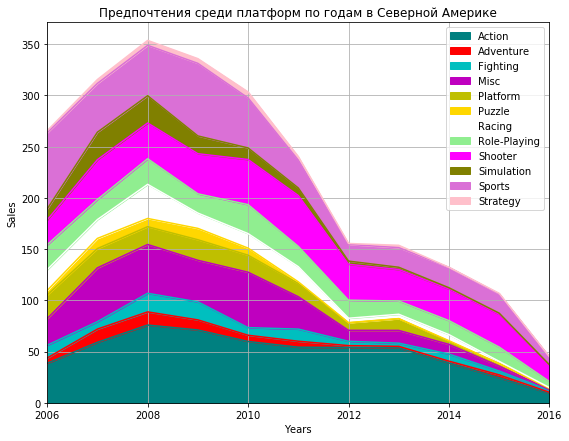

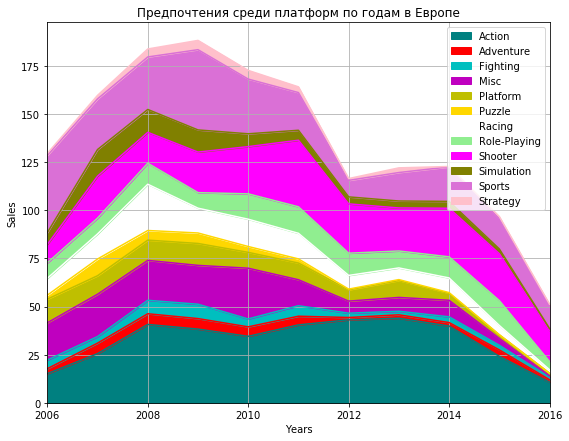

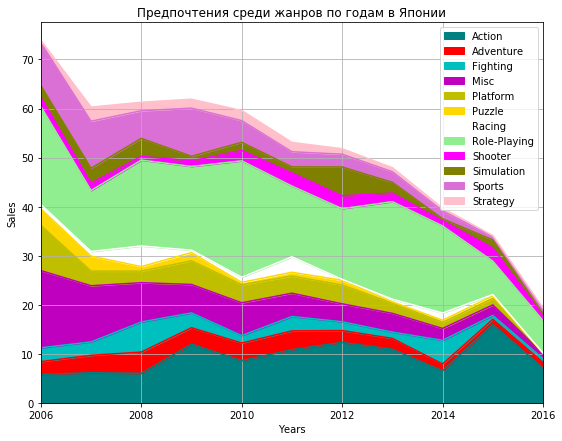

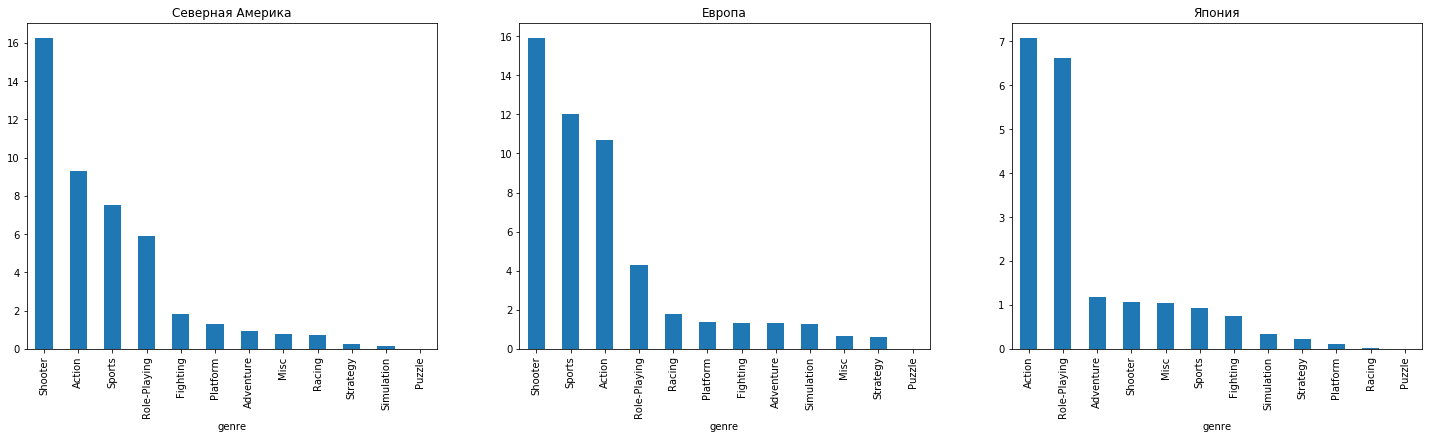

In [46]:
#График продаж по жанрам в Северной Америке
region_preferences(games_filtered, 'genre', 'na_sales', 'Предпочтения среди платформ по годам в Северной Америке')
#График продаж по жанрам в Европе
region_preferences(games_filtered, 'genre', 'eu_sales', 'Предпочтения среди платформ по годам в Европе')
#График продаж по жанрам в Японии
region_preferences(games_filtered, 'genre', 'jp_sales', 'Предпочтения среди жанров по годам в Японии')

fig, axes = plt.subplots(1, 3, figsize=(25,6))
#Продажи по жанра за 2016 год в Северной Америке
plots(games_filtered, 'genre', 'na_sales', 'Северная Америка', 0)
#Продажи по платформам за 2016 год в Европе
plots(games_filtered, 'genre', 'eu_sales', 'Европа', 1)
#Продажи по жанрам за 2016 год в Японии
plots(games_filtered, 'genre', 'jp_sales', 'Япония', 2)


Самый популярный жанр в Северной Америке - **Shooter**, затем **Action**, **Sports**, **Role-Playing** и **Fighting**;  
  
Самый популярный жанр в Европе - **Shooter**, затем **Sports**, **Action**, **Role-Playing** и **Racing**. Практически также, как и в Северной Америке, только 4 и 5 место поменялись между собой;  
  
Самый популярный жанр в Японии - **Action**, затем **Role-Playing**, **Adventure**, **Shooter** и **Misc**. И опять предпочтения в Японии полностью отличаются от Европейских и Северо-Американских.



#### Влияние рейтинга ESRB на продажи в отдельном регионе<a name="Шаг4.3"></a>

In [47]:

filtered = games_filtered.query('year_of_release > 2015').groupby('rating')['na_sales'].sum().sort_values(ascending = False)

total_na = filtered.sum()





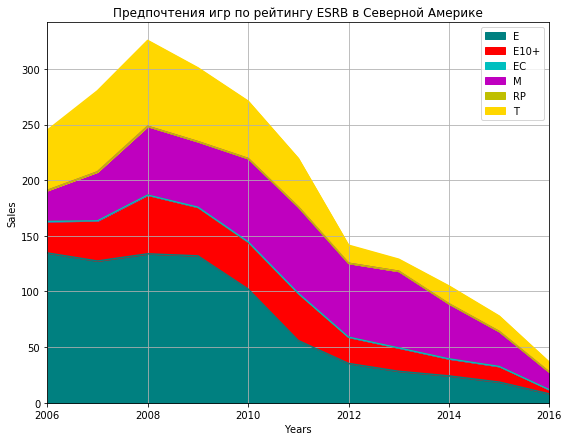

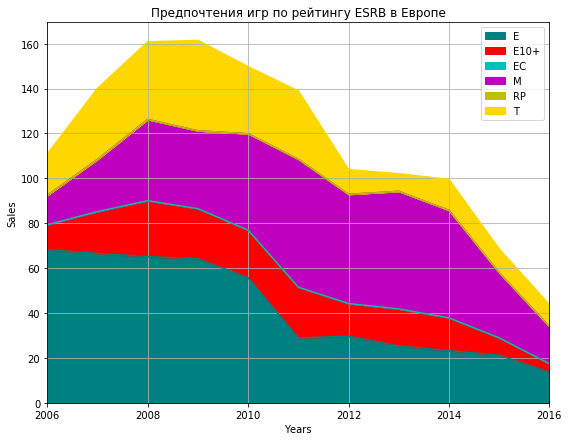

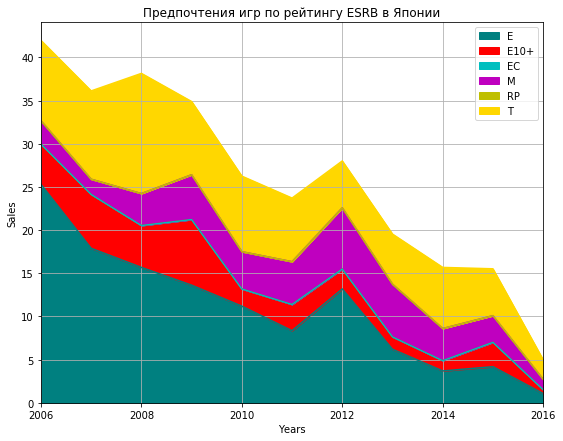

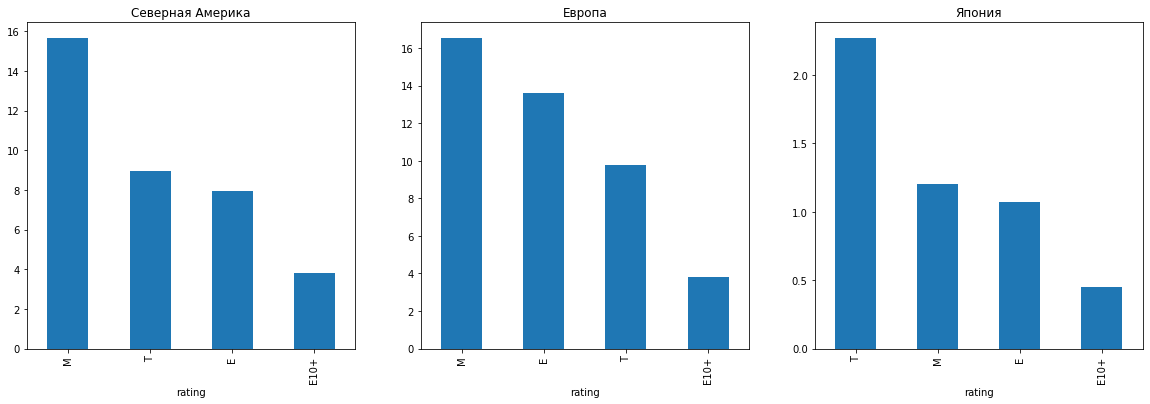

In [48]:
#График продаж по рейтингу ESRB в Северной Америке

region_preferences(games_filtered, 'rating', 'na_sales', 'Предпочтения игр по рейтингу ESRB в Северной Америке')
#График продаж по рейтингу ESRB в Европе
region_preferences(games_filtered, 'rating', 'eu_sales', 'Предпочтения игр по рейтингу ESRB в Европе')
#График продаж по рейтингу ESRB в Японии
region_preferences(games_filtered, 'rating', 'jp_sales', 'Предпочтения игр по рейтингу ESRB в Японии')

fig, axes = plt.subplots(1, 3, figsize=(20,6))
#Продажи по рейтингу ESRB за 2016 год в Северной Америке
plots(games_filtered, 'rating', 'na_sales' , 'Северная Америка',  0)
#Продажи по рейтингу ESRB за 2016 год в Европе
plots(games_filtered, 'rating', 'eu_sales', 'Европа', 1)
#Продажи по рейтингу ESRB за 2016 год в Японии
plots(games_filtered, 'rating', 'jp_sales', 'Япония', 2)



Самая популярная возрастая категория игр в Северной Америке - **«M»** («Mature») — «От 17 лет»;  
  
Самая популярная возрастая категория игр в Европе - также как и в Северной Америке **«M»** («Mature») — «От 17 лет» и не сильно отстает от нее категория **«E»** («Everyone») — «Для всех»: 6+ лет;    


Самая популярная возрастая категория игр в Японии - **«T»** («Teen») — «Подросткам 13—19 лет» - очередное отличие от западных регионов.  Объединяет Японию с другими регионами то, что самая непопулярная возростная категория это **«E10+»** («Everyone 10 and older») — «Для всех старше 10 лет»;  
  
За последние 10 лет в каждом регионе было продано больше игр с рейтингом **«E»** («Everyone») — «Для всех»: 6+ лет. То есть, можно предположить, что прослеживается тенденция запрета для детей играть в игровые приставки в раннем возрасте.  
  
То есть возрастная категория, которая активно играет в игры на приставках в Северной Америке это 17 лет и старше, в Европе от 6 лет и старше, а в Японии играют в основном подростки 13 - 19 лет. 
  
Четкая закономерность продажи игр с определенным возрастным рейтингом просматривается, значит можно сказать, что рейтинг ESRB влияет на продажи в регионах.

### Вывод   <a name="Шаг4.4"></a>
#### Предпочтения по платформам и жанрам в регионах
- 
В Северной Америке самой популярной платформой к 2016 году стала **PS4**, на втором месте **XOne**, 3место - **3DS**, 4ое - **WiiU** и на 5 месте -  **PC**.  
Новые платформы пользуются большей популярностью, что и не удивительно, ведь с каждой выпущенной платформой улучшается ее функционал.
- 
В Европе самой популярной платформой к 2016 году стала **PS4**, на втором месте **XOne**, 3место - **PC**, 4ое - **3DS** и на 5 месте -  **WiiU**.   
Разница с предпочтениями в Северной Америке начинается с 3 места, первые два идентичны, **PC**, в Америке занимает 5 место, а в Европе 3.
- 
В Японии картина предпочтений платформ совершенно иная, чем в Северной Америке и Европе.  
1 место - **3DS**  
2 место - **PS4**  
3 место - **PSV**  
4 место - **PS3**  
5 место - **WiiU**

- 
Самый популярный жанр в Северной Америке - **Shooter**, затем **Action**, **Sports**, **Role-Playing** и **Fighting**.
- 
Самый популярный жанр в Европе - **Shooter**, затем **Sports**, **Action**, **Role-Playing** и **Racing**. Практически также, как и в Северной Америке, только 4 и 5 место поменялись между собой.
- 
Самый популярный жанр в Японии - **Action**, затем **Role-Playing**, **Adventure**, **Shooter** и **Misc**. И опять предпочтения в Японии полностью отличаются от Европейских и Северо-Американских.
#### Влияние рейтинга ESRB на продажи в отдельном регионе
- 
Самая популярная возрастая категория игр в Северной Америке - **«M»** («Mature») — «От 17 лет»;  
- 
Самая популярная возрастая категория игр в Европе - также как и в Северной Америке **«M»** («Mature») — «От 17 лет» и не сильно отстает от нее категория **«E»** («Everyone») — «Для всех»: 6+ лет;    
- 
Самая популярная возрастая категория игр в Японии - **«T»** («Teen») — «Подросткам 13—19 лет» - очередное отличие от западных регионов. Объединяет Японию с другими регионами то, что самая непопулярная возростная категория это **«E10+»** («Everyone 10 and older») — «Для всех старше 10 лет»;  
- 
То есть возрастная категория, которая активно играет в игры на приставках в Северной Америке это 17 лет и старше, в Европе от 6 лет и старше, а в Японии играют в основном подростки 13 - 19 лет.
- 
За последние 10 лет в каждом регионе было продано больше игр с рейтингом **«E»** («Everyone») — «Для всех»: 6+ лет. То есть, можно предположить, что прослеживается тенденция запрета для детей играть в игровые приставки в раннем возрасте.  
- 
Четкая закономерность продажи игр с определенным возрастным рейтингом просматривается, значит можно сказать, что рейтинг ESRB влияет на продажи в регионах.  
  
Таким образом можно говорить о том, что вкусы в Европе и Северной Америке схожи, а вот в Японии совсем другие предпочтения.



### Шаг 5. Проверка гипотезы <a name="Шаг5"></a>

Воспользуюсь т-тестом ttest_ind из модуля scipy.stats поскольку выборки независимые.

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые <a name="Шаг5.1"></a>

In [49]:
#H0 = Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
#H1 = Средние пользовательские рейтинги платформ Xbox One и PC разные

#Так как пропуски в столбцах с отзывами были заполнены значениями -1 
#берем данные по отзывам >= 0 что бы среднии значения не пеменялись из-за предыдущей замены.

#Покольку объем выборки измеряется сотнями, выбираем уровень значимости 0.05
alpha = 0.05

XOne_user_score = games[(games['platform'] == 'XOne') & (games['user_score'] >= 0)]['user_score']
PC_user_score = games[(games['platform'] == 'PC') & (games['user_score'] >= 0)]['user_score']

results = st.ttest_ind(XOne_user_score, PC_user_score) 
print('p-значение:', results.pvalue) 

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

p-значение: 1.0805499364951891e-05
Отвергаем нулевую гипотезу


Получается мы не можем утверждать что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [50]:
#Проверка результата
PC_user_score.mean() - XOne_user_score.mean()

0.547411063512758

Не сильно, но результаты различаются.

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные  <a name="Шаг5.2"></a>


In [51]:
#H0 = Средние пользовательские рейтинги жанров Action и Sports одинаковые
#H1 = Средние пользовательские рейтинги жанров Action и Sports разные

#Так как пропуски в столбцах с отзывами были заполнены значениями -1 
#берем данные по отзывам >= 0 что бы среднии значения не пеменялись из-за предыдущей замены.
alpha = 0.05
#Покольку объем выборки измеряется сотнями, выбираем уровень значимости 0,05
Action_user_score = games[(games['genre'] == 'Action') & (games['user_score'] >= 0)]['user_score']
Sports_user_score = games[(games['genre'] == 'Sports') & (games['user_score'] >= 0)]['user_score']

results = st.ttest_ind(Action_user_score, Sports_user_score) 
print('p-значение:', results.pvalue) 

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

p-значение: 0.08026182535600913
Не получилось отвергнуть нулевую гипотезу


Получается мы не можем отвергнуть гипотезу, что средние пользовательские рейтинги жанров Action и Sports  одинаковые

In [52]:
Action_user_score.mean() - Sports_user_score.mean()

0.10010828879681277

Разница совсем не существенная, можно считать, что рейтинги жанров одинаковые.

### Вывод: <a name="Шаг5.3"></a>  
  
В результате проведения t-теста Стьюдента мы получили следующие результат:  
  
1. Средние пользовательские рейтинги платформ **Xbox One** и **P**C не одинаковые и при проведении проверки выяснилось, что разница между ними 0.5 в пользу **PC**;
  
2. Cредние пользовательские рейтинги жанров **Action** и **Sports** одинаковые, при проведении проверки было выявлено различие в 0.1, но данное различие слишком мало для утверждения того, что рейтинги разные. Такой результат мог появиться случайно, в результате того, что оценок по одному жанру было предоставлено больше, чем по второму.

### Шаг 6. Общий вывод <a name="Шаг6"></a>

#### Количество игр, выпущенных в разные годы:
- 
Больше всего игр выпускалось в период с 2006 по 2011 годы, самый пик в 2008 - 2009 годы.  
В период с 1980 по 1994 выпускалось очень мало игр так что данные за этот период можем не считать и дальнейший анализ будем проводить по данным с 1995 по 2016 год.;

#### Уровень продаж и цикл жизни платформ:
- 
5 платформ **PS2, X360, PS3, Wii, DS, PS** особо популярны по отношению к другим, их средний уровень продаж превышает в два раза уровень продаж остальных платформ;
- 
По данным 5-ки самых популярных платформ в среднем платформы держатся на рынке 10 лет:  
**PS**: 1994 - 2003  
**PS2**: 2000 - 2011  
**DS**: 2004 - 2013  
**X360**: 2005 - 2016  
**PS3**: 2005 - 2016  
**Wii**: 2006 - 2016  
**PS4**: 2013 -  наст. время
 
  
То есть в среднем платформы держатся на рынке 10 лет. Поэтому предположительно **PS4** будет популярна на рынке еще до 2023 года;
- 
Несмотря на то, что по принесенной прибыли за все время лидируют **X360, PS3** и **Wii**, по продажам в последние годы лидируют **PS4, XOne, 3DS, PS3**, это связано с тем, что пик продаж приходился на 2008 год, к 2016 году продажи по всем платформам снизились, соответственно и общая прибыль более молодых платформ снизилась.  
В 2016 году больше всего прибыли приносит **PS4**.

#### Разница в продажах по платформам за последние 10 лет:
- 
Медиана распределения продаж больше всех у **PS3**(~ 99), затем идет **PS4**(~ 70), **XOne**(~ 30) и самая маленькая у  **3DS**(~ 15), то есть получается, что **PS3** и **PS4** по медиане приносят в два раза больше продаж, чем другие платформы.


#### Зависимость продаж от отзывов:
- 
Согласно данным по платформе **PS3**, которая среди прочих просуществовала достаточно долго и все еще является одной из лидирующей платформ на рынке, чем лучше отзыв критиков у игры, тем больше она продается и тем самым приносит больше прибыли, это логично, поскольку часто игры покупают опираясь на отзыв критиков, чем он лучше и больше рейтинг, тем чаще игру будут покупать).  
С рейтингом игроков такая же картина, однако присутствует больше выбросов, вероятно, так получается поскольку игроки покупают известную игру, но в последствии разочаровываются в ней, на вкус и цвет. 
  
#### Соотнесение выводов по продажам игр на PS4 с другими платформами:
- 
У **PS4** продажи зависят от отзывов критиков, чем выше рейтинг критиков, тем больше продаж, и практически не зависят от отзывов пользователей (в PS3 отзывы пользователей имеют более весомое значение чем у данной платформы);  
У **XOne** также продажи больше, чем больше рейтинг критиков, и практически не зависят от отзывов пользователей (в PS3 отзывы пользователей имеют более весомое значение чем у данной платформы);  
А вот у **DS3** продажи одинаково зависят как от отзывов критиков, так и от отзывов пользователей.

#### Распределение прибыли по жанрам:
- 
**Action** - самый прибыльный жанр, за последние 10 лет на ходовых платформах принес  491.52 миллиона долларов. С 2006 года набор популярность достиг пика в 2013-2014 годах, а после 2014 прибыль по нему начала уменьшаться. Стоит заметить что прибыль падает к 2016 году от всех жанров.  
В последние годы самыми прибыльными являются **Action**, **Shooter**, **Role-Playing** и **Sports**. Эти жанры и за 10-тилетие принесли больше всего прибыли, следом за ними идет **Racing**, а оставшиеся игры принесли прибыть сильно менее 100 миллионов долларов за 10 лет.  
Самые не прибыльные жанры **Puzzle** и **Strategy** принесли меньше 5 миллионов долларов за 10 лет.


#### Предпочтения по платформам и жанрам в регионах
- 
В Северной Америке самой популярной платформой к 2016 году стала **PS4**, на втором месте **XOne**, 3место - **3DS**, 4ое - **WiiU** и на 5 месте - **PC**.  
Новые платформы пользуются большей популярностью, что и не удивительно, ведь с каждой выпущеной платформой улучшается ее ыункционал.
- 
В Европе самой популярной платформой к 2016 году стала **PS4**, на втором месте **XOne**, 3место - **PC**, 4ое - **3DS** и на 5 месте - **WiiU**.   
Разница с предпочтениями в Северной Америке начинается с 3 места, первые два идентичны, **PC**, в Америке занимает 5 место, а в Европе 3.
- 
В Японии картина предпочтений платформ совершенно иная, чем в Северной Америке и Европе.  
1 место - **3DS**  
2 место - **PS4**  
4 место - **PSV**  
5 место - **PS3**  

- 
Самый популярный жанр в Северной Америке - **Shooter**, затем **Action**, **Sports**, **Role-Playing** и **Fighting**.
- 
Самый популярный жанр в Европе - **Shooter**, затем **Sports**, **Action**, **Role-Playing** и **Racing**. Практически также, как и в Северной Америке, только 4 и 5 место поменялись между собой.
- 
Самый популярный жанр в Японии - **Action**, затем **Role-Playing**, **Adventure**, **Shooter** и **Misc**. И опять предпочтения в Японии полностью отличаются от Европейских и Северо Американских.  

#### Влияние рейтинга ESRB на продажи в отдельном регионе
- 
Самая популярная возрастая категория игр в Северной Америке - **«M»** («Mature») — «От 17 лет»;  
- 
Самая популярная возрастая категория игр в Европе - также как и в Северной Америке **«M»** («Mature») — «От 17 лет» и не сильно отстает от нее категория **«E»** («Everyone») — «Для всех»: 6+ лет;    
- 
Самая популярная возрастая категория игр в Японии - **«T»** («Teen») — «Подросткам 13—19 лет» - очередное отличие от западных регионов. Объединяет Японию с другими регионами то, что самая непопулярная возростная категория это **«E10+»** («Everyone 10 and older») — «Для всех старше 10 лет»;  
- 
За последние 10 лет в каждом регионе было продано больше игр с рейтингом **«E»** («Everyone») — «Для всех»: 6+ лет. То есть, можно предположить, что прослеживается тенденция запрета для детей играть в игровые приставки в раннем возрасте;  
- 
То есть возрастная категория, которая активно играет в игры на приставках в Северной Америке это 17 лет и старше, в Европе от 6 лет и старше, а в Японии играют в основном подростки 13 - 19 лет;
- 
Четкая закономерность продажи игр с определенным возрастным рейтингом просматривается, значит можно сказать, что рейтинг ESRB влияет на продажи в регионах.  

#### Гипотезы
   
   
- 
В результате проведения t-теста Стьюдента мы получили следующие результат:  
  
1. Средние пользовательские рейтинги платформ **Xbox One** и **PC** не одинаковые и при проведении проверки выяснилось, что разница между ними 0.5 в пользу **PC**;
  
2. Cредние пользовательские рейтинги жанров **Action** и **Sports** одинаковые, при проведении проверки было выявлено различие в 0.1, но данное различие слишком мало для утверждения того, что рейтинги разные. Такой результат мог появиться случайно, в результате того, что оценок по одному жанру было предоставлено больше, чем по второму.

#### Рекламные кампании

Рекламные компании надо разделить на два вида:  
1 - для **Северной Америки и Европы**, так как предпочтения в жанрах и платформах там одинаковые;  
2 - для **Японии**, так как их предпочтения совершенно иные, а значит и продукт надо рекламировать иначе.    

Для Северной Америки и Европы стоит рекламировать игры в жанрах **Shooter, Action,** и **Sports** на платформах **PS4** и **XOne**.  
В Японии более ходовыми и прибыльными будут жанры **Action** и **Role-Playing** на платформы **3DS** и **PS4**.

В случае если невозможно проводить разные рекламные компании стоит рекламировать игры жанра **Action** для платформы **PS4**.
